In [ ]:
#Example:1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

#load sepal length, sepal width, petal length, petal width in X and y is iris.target 3 classes → 0, 1, 2
X, y = load_iris(return_X_y=True)


# Split data in to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
#Example:2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

#load sepal length, sepal width, petal length, petal width in X and y is iris.target 3 classes → 0, 1, 2
X, y = load_iris(return_X_y=True)


# Split data in to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9777777777777777
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


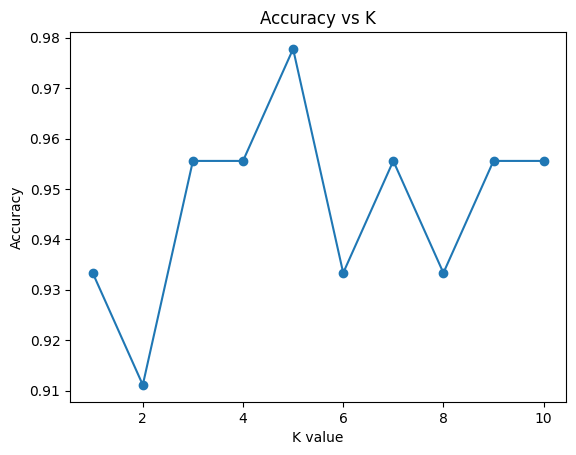

In [ ]:
#Example:3

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = range(1, 11)
accuracy = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
plt.plot(k_values, accuracy, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

In [ ]:
#Example:4

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy after scaling:",accuracy_score(y_test, knn.predict(X_test)))

Accuracy after scaling: 1.0


In [ ]:
#Example:5

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_reg.fit(X, y)
print("Predicted value for Sepal length=3.5 ,Sepal width=2.5 ,Petal length=5 ,Petal width=1.5 is",knn_reg.predict([[3.5,2.5,5,1.5]]))

Predicted value for Sepal length=3.5 ,Sepal width=2.5 ,Petal length=5 ,Petal width=1.5 is [1.5]


In [ ]:
#Example:6

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

data=load_breast_cancer()
X=data.data
y=data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



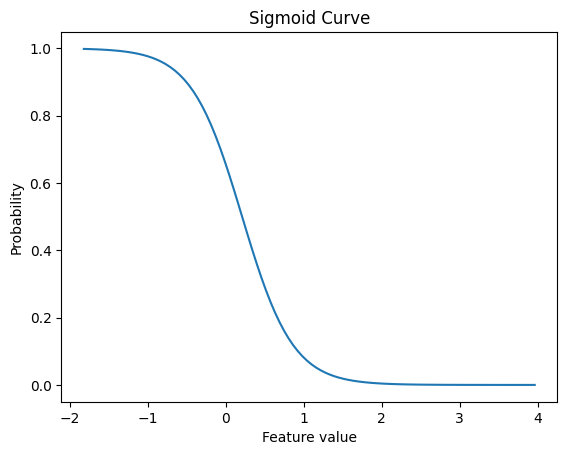

In [ ]:
#Example:7

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


X_feature = X[:, 0].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

x_values = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100).reshape(-1, 1)
y_values = model.predict_proba(x_values)[:, 1]

plt.plot(x_values, y_values)
plt.xlabel("Feature value")
plt.ylabel("Probability")
plt.title("Sigmoid Curve")
plt.show()

AUC Score: 0.99737962659679


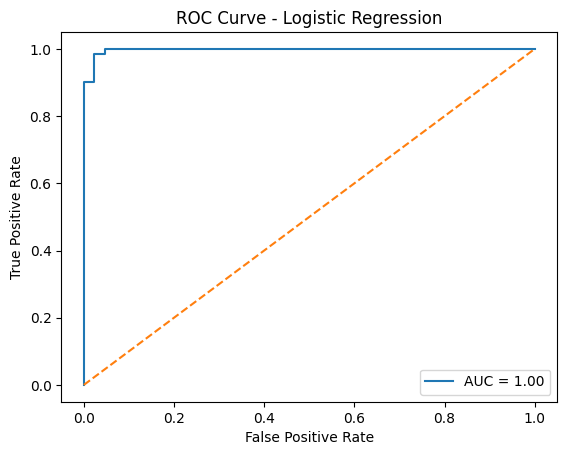

In [ ]:
#Example:8

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Using y_prob[:, 1] for the positive class probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
auc_score = roc_auc_score(y_test, y_prob[:, 1])

print("AUC Score:", auc_score)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [ ]:
#Excercise:1


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


df=pd.read_csv('diabetes.csv')
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy after scaling:",accuracy_score(y_test, knn.predict(X_test)))

Accuracy after scaling: 0.7012987012987013
